In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
url =  'https://github.com/alvarosp02/TFG/raw/main/data/house_prices_train.csv'
df = pd.read_csv(url)
df.describe()
#df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

#Se quita SalePrice que tiene 1 de correlación consigo misma
print(correlation_with_saleprice[1:])

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


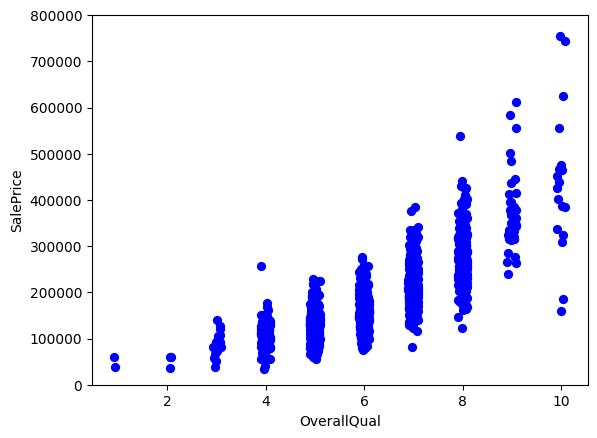

In [ ]:
"""var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);"""

var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)

#Agregar un pequeño jitter a la variable OverallQual
jitter_strength = 0.1  #Ajusta la fuerza del jitter según sea necesario
data['Jittered_' + var] = data[var] + np.random.uniform(-jitter_strength, jitter_strength, size=data[var].shape)

#Crear el gráfico de dispersión con jitter
data.plot.scatter(x='Jittered_' + var, y='SalePrice', ylim=(0, 800000), s=32, color='blue')

plt.xlabel(var)
plt.ylabel('SalePrice')
plt.title('')
plt.show()

Partimos los datos en 2 para que el modelo aprenda 2 tareas

In [ ]:
df1 = df[df.YearBuilt < 2000]
df2 = df[df.YearBuilt >= 2000]

df1.shape, df2.shape

((1072, 81), (388, 81))

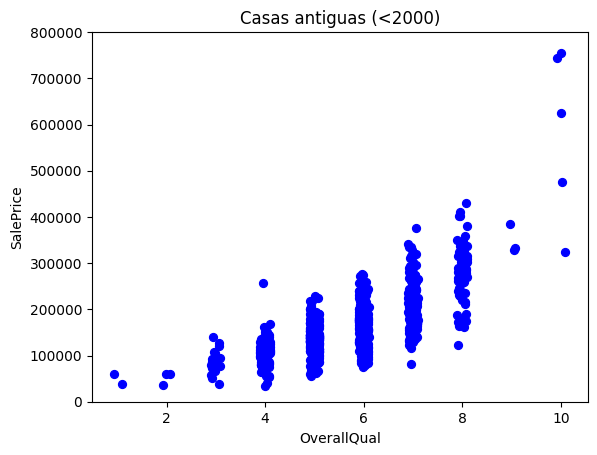

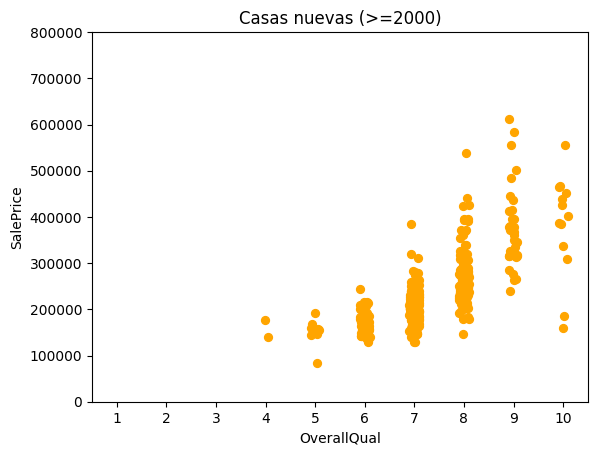

In [ ]:
var = 'OverallQual'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)

jitter_strength = 0.1
data['Jittered_' + var] = data[var] + np.random.uniform(-jitter_strength, jitter_strength, size=data[var].shape)

data.plot.scatter(x='Jittered_' + var, y='SalePrice', ylim=(0, 800000), s=32, color='blue')

plt.xlabel(var)
plt.ylabel('SalePrice')
plt.title('Casas antiguas (<2000)')
plt.show()



data = pd.concat([df2['SalePrice'], df2[var]], axis=1)

jitter_strength = 0.1
data['Jittered_' + var] = data[var] + np.random.uniform(-jitter_strength, jitter_strength, size=data[var].shape)

ax = data.plot.scatter(x='Jittered_' + var, y='SalePrice', ylim=(0, 800000), s=32, color='orange')

#Ajustar el rango del eje x para incluir todos los valores de 1 a 10
plt.xlabel(var)
plt.ylabel('SalePrice')
plt.title('Casas nuevas (>=2000)')
plt.xlim(0.5, 10.5)  #Ajustar según el rango deseado
plt.xticks(np.arange(1, 11, 1))
plt.show()

Sesgo: 
-96206.07951476038
Coeficientes: 
[45435.8025931]


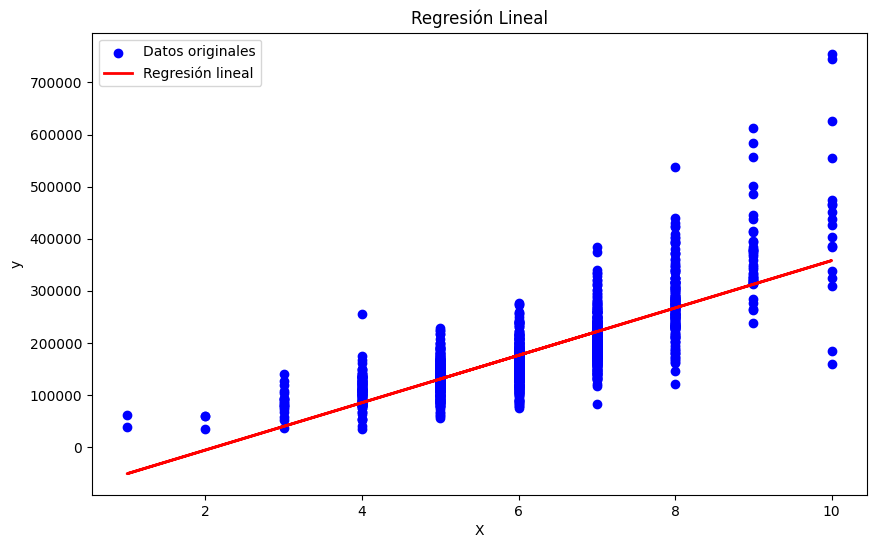

In [ ]:
X = df[['OverallQual']]
y = df['SalePrice']

model = LinearRegression()
model.fit(X, y)

print("Sesgo: ")
print(model.intercept_)
print("Coeficientes: ")
print(model.coef_)

def plot_regression_line(model, X, y):
    X = X.reshape(-1, 1) if X.ndim == 1 else X

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))

    plt.scatter(X, y, color='blue', label='Datos originales')

    plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión lineal')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Regresión Lineal')
    plt.legend()

    plt.show()

plot_regression_line(model, X, y)

Sesgo: 
-70250.68811221994
Coeficientes: 
[40680.91655443]


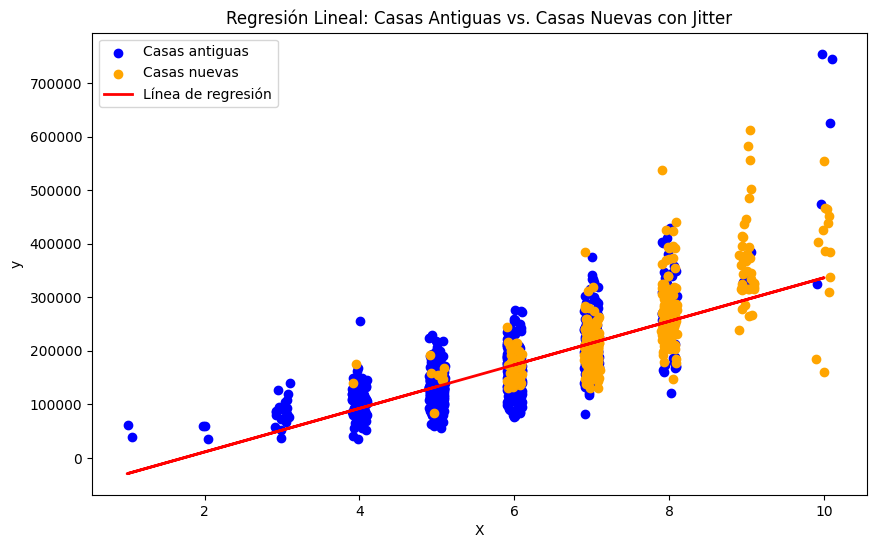

In [ ]:
X1 = df1[['OverallQual']]
y1 = df1['SalePrice']

model = LinearRegression()
model.fit(X1, y1)

print("Sesgo: ")
print(model.intercept_)
print("Coeficientes: ")
print(model.coef_)


X2 = df2[['OverallQual']]
y2 = df2['SalePrice']


def plot_two_datasets(model, X1, y1, X2, y2, jitter_strength=0.1):
    X1 = X1.reshape(-1, 1) if X1.ndim == 1 else X1
    X2 = X2.reshape(-1, 1) if X2.ndim == 1 else X2

    #Agregar jitter a los datos X1 y X2
    X1_jittered = X1 + np.random.uniform(-jitter_strength, jitter_strength, size=X1.shape)
    X2_jittered = X2 + np.random.uniform(-jitter_strength, jitter_strength, size=X2.shape)

    y_train_pred = model.predict(X1)

    plt.figure(figsize=(10, 6))

    plt.scatter(X1_jittered, y1, color='blue', label='Casas antiguas')

    plt.scatter(X2_jittered, y2, color='orange', label='Casas nuevas')

    plt.plot(X1, y_train_pred, color='red', linewidth=2, label='Línea de regresión')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Regresión Lineal: Casas Antiguas vs. Casas Nuevas con Jitter')
    plt.legend()

    plt.show()

plot_two_datasets(model, X1, y1, X2, y2, jitter_strength=0.1)

Sesgo: 
-188074.0909748641
Coeficientes: 
[58141.01715915]


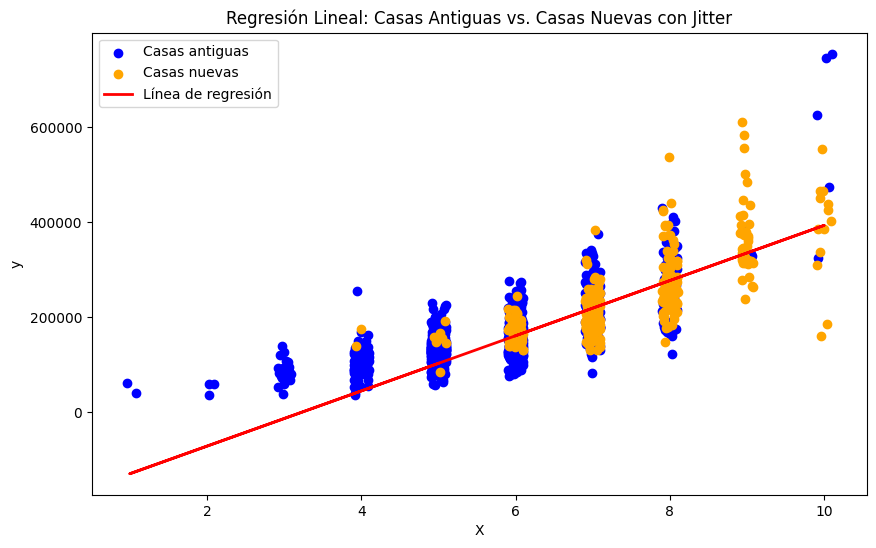

In [ ]:
model = LinearRegression()
model.fit(X2, y2)

print("Sesgo: ")
print(model.intercept_)
print("Coeficientes: ")
print(model.coef_)

plot_two_datasets(model, X1, y1, X2, y2, jitter_strength=0.1)

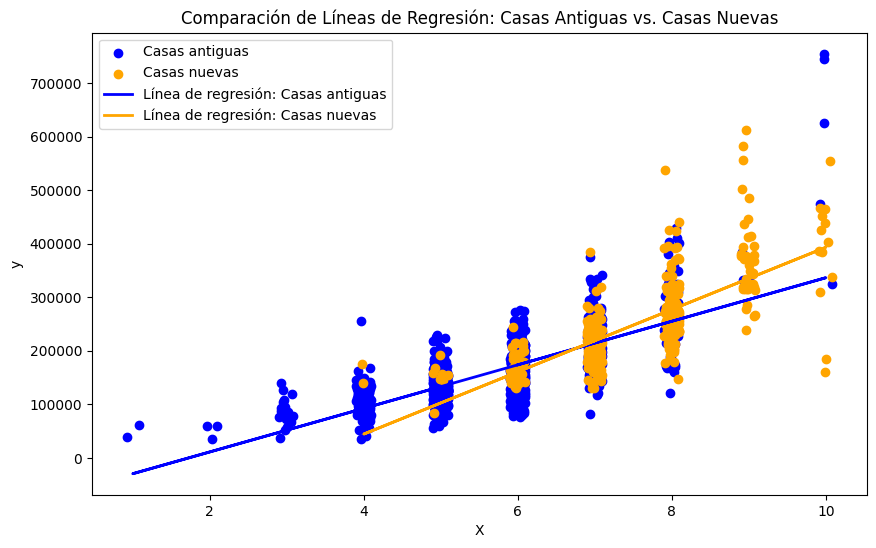

In [ ]:
def plot_two_regression_lines(X1, y1, X2, y2, jitter_strength=0.1):
    X1 = X1.reshape(-1, 1) if X1.ndim == 1 else X1
    X2 = X2.reshape(-1, 1) if X2.ndim == 1 else X2

    X1_jittered = X1 + np.random.uniform(-jitter_strength, jitter_strength, size=X1.shape)
    X2_jittered = X2 + np.random.uniform(-jitter_strength, jitter_strength, size=X2.shape)

    model1 = LinearRegression().fit(X1, y1)
    model2 = LinearRegression().fit(X2, y2)

    y1_pred = model1.predict(X1)
    y2_pred = model2.predict(X2)

    plt.figure(figsize=(10, 6))

    plt.scatter(X1_jittered, y1, color='blue', label='Casas antiguas')
    plt.scatter(X2_jittered, y2, color='orange', label='Casas nuevas')

    plt.plot(X1, y1_pred, color='blue', linewidth=2, label='Línea de regresión: Casas antiguas')
    plt.plot(X2, y2_pred, color='orange', linewidth=2, label='Línea de regresión: Casas nuevas')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Comparación de Líneas de Regresión: Casas Antiguas vs. Casas Nuevas')
    plt.legend()

    plt.show()

plot_two_regression_lines(X1, y1, X2, y2, jitter_strength=0.1)